# Analyzing networks in Python
Some of the codes are adapted from https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience, Chapter 1-2.

# Import modules

In [18]:
!pip install networkx
!pip install matplotlib

import networkx as nx

import pandas as pd
import matplotlib.pyplot as plt
import urllib, json


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading a Network
### House Graph example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [19]:
HG = nx.house_graph()

In [20]:
## Nodes
HG.nodes()

NodeView((0, 1, 2, 3, 4))

In [21]:
## Edges
HG.edges()

EdgeView([(0, 1), (0, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

### Visualization example
https://networkx.org/documentation/stable/auto_examples/drawing/plot_house_with_colors.html

In [22]:
# draw the graph
nx.draw(HG, with_labels=True)

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

In [ ]:
nx.draw(HG,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

In [ ]:
pos = {0: (0, 0), 1: (1, 0), 2: (0, 1), 3: (1, 1), 4: (0.5, 2.0)}
nx.draw_networkx_nodes(
    HG, pos, node_size=3000, nodelist=[0, 1, 2, 3], node_color="tab:blue"
)
nx.draw_networkx_nodes(HG, pos, node_size=2000, nodelist=[4], node_color="tab:orange")
nx.draw_networkx_edges(HG, pos, alpha=1, width=6)
nx.draw_networkx_labels(HG, pos, font_size=20)

plt.tight_layout()

# Types of Representations

### Edge List

In [ ]:
list( HG.edges() )

### Adjacency Matrix

In [ ]:
ADJ = nx.to_pandas_adjacency(HG)
ADJ

### Node-edge list

In [ ]:
nx.to_dict_of_lists(HG)

# Graph methods

In [ ]:
# nodes (iterator)
HG.nodes()

In [ ]:
# edges (iterator)
HG.edges()

In [ ]:
# number of nodes and edges
HG.number_of_nodes(), HG.number_of_edges()

In [ ]:
# Let's see neighbors of a certain node
HG.neighbors(1)

In [ ]:
[neighbor for neighbor in HG.neighbors(1)]

In [ ]:
HG.degree(1)

# Directed graphs

In [ ]:
D = nx.DiGraph()

D.add_edges_from([('Albert','Bob'),('Bob', 'Cathy'),('Cathy','Bob'),('Cathy','Donald'),
 ('Cathy', 'Edward'),('Donald','Edward'),('Donald','Frank'),('Edward','Frank'),('Frank','Donald'),('Donald','Bob')])

nx.draw(D, with_labels=True)

In [ ]:
D.has_edge('Albert','Bob'), D.has_edge('Bob','Albert'),

In [ ]:
D.in_degree('Bob')

In [ ]:
D.out_degree('Bob')

## Some Metrics

Network density

In [ ]:
nx.density(HG)

In [ ]:
nx.density(D)

Degree centrality

In [ ]:
nx.degree_centrality(HG)

In [ ]:
nx.in_degree_centrality(D)

In [ ]:
nx.out_degree_centrality(D)

Shortest path



In [ ]:
nx.shortest_path(HG,0,4)

In [ ]:
nx.shortest_path(D, 'Edward', 'Bob')

Betweenness centrality

In [ ]:
nx.betweenness_centrality(HG, normalized=False)

In [ ]:
nx.betweenness_centrality(D, normalized=False)

# Les Miserables Graph
*   Nodes: Each of the characters in Les Miserables.
*   Edges: Pairs of characters co-appearing in the same chapter(s).

In [23]:
lemis_url = 'https://raw.githubusercontent.com/plotly/datasets/master/miserables.json'
with urllib.request.urlopen(lemis_url) as url:
    raw_data = json.loads(url.read().decode())

In [24]:
nodes = raw_data['nodes']
nodelist = [(a["name"]) for a in nodes]

In [25]:
edgelist = raw_data['links']
edgelist = [(a["source"], a["target"]) for a in edgelist]

In [26]:
edgelist = [(nodelist[a], nodelist[b]) for a, b in edgelist]
edgelist

[('Napoleon', 'Myriel'),
 ('Mlle.Baptistine', 'Myriel'),
 ('Mme.Magloire', 'Myriel'),
 ('Mme.Magloire', 'Mlle.Baptistine'),
 ('CountessdeLo', 'Myriel'),
 ('Geborand', 'Myriel'),
 ('Champtercier', 'Myriel'),
 ('Cravatte', 'Myriel'),
 ('Count', 'Myriel'),
 ('OldMan', 'Myriel'),
 ('Valjean', 'Labarre'),
 ('Valjean', 'Mme.Magloire'),
 ('Valjean', 'Mlle.Baptistine'),
 ('Valjean', 'Myriel'),
 ('Marguerite', 'Valjean'),
 ('Mme.deR', 'Valjean'),
 ('Isabeau', 'Valjean'),
 ('Gervais', 'Valjean'),
 ('Listolier', 'Tholomyes'),
 ('Fameuil', 'Tholomyes'),
 ('Fameuil', 'Listolier'),
 ('Blacheville', 'Tholomyes'),
 ('Blacheville', 'Listolier'),
 ('Blacheville', 'Fameuil'),
 ('Favourite', 'Tholomyes'),
 ('Favourite', 'Listolier'),
 ('Favourite', 'Fameuil'),
 ('Favourite', 'Blacheville'),
 ('Dahlia', 'Tholomyes'),
 ('Dahlia', 'Listolier'),
 ('Dahlia', 'Fameuil'),
 ('Dahlia', 'Blacheville'),
 ('Dahlia', 'Favourite'),
 ('Zephine', 'Tholomyes'),
 ('Zephine', 'Listolier'),
 ('Zephine', 'Fameuil'),
 ('Zephin

### Create a networkx object with the information above
https://networkx.org/documentation/networkx-1.0/tutorial/tutorial.html

In [27]:
LM_G = nx.Graph()
LM_G.add_edges_from(edgelist)

In [28]:
LM_G.number_of_nodes()

77

In [29]:
LM_G.degree('Valjean')

36

In [30]:
[neighbor for neighbor in LM_G.neighbors('Valjean')]

['Labarre',
 'Mme.Magloire',
 'Mlle.Baptistine',
 'Myriel',
 'Marguerite',
 'Mme.deR',
 'Isabeau',
 'Gervais',
 'Fantine',
 'Mme.Thenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Woman2',
 'MotherInnocent',
 'Gavroche',
 'Gillenormand',
 'Mlle.Gillenormand',
 'Marius',
 'Enjolras',
 'Bossuet',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Toussaint']

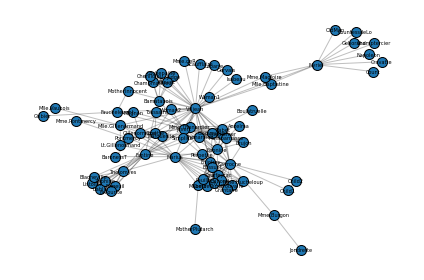

In [31]:
ax = plt.subplots()

pos = nx.spring_layout(LM_G, seed=200)
nx.draw_networkx_edges(LM_G, pos, alpha=0.25, width=1)
nx.draw_networkx_nodes(LM_G, pos, node_size=100).set_edgecolor('black')

# Add labels to the nodes
labels = {node: str(node) for node in LM_G.nodes()}  # Replace str(node) with your actual labels
nx.draw_networkx_labels(LM_G, pos, labels, font_size=5, font_color='black')

plt.tight_layout()
plt.axis("off")
plt.show()

In [32]:
df = pd.DataFrame( nx.degree(LM_G), columns=['node', 'degree'] )
df.sort_values('degree', ascending=False)

,node,degree
10,Valjean,36
48,Gavroche,22
55,Marius,19
27,Javert,17
25,Thenardier,16
...,...,...
13,Mme.deR,1
14,Isabeau,1
15,Gervais,1
32,Scaufflaire,1


In [33]:
nx.degree_centrality(LM_G)['Valjean']

0.47368421052631576

In [34]:
nx.betweenness_centrality(LM_G)['Valjean']

0.5699890527836184

In [35]:
nx.closeness_centrality(LM_G)['Valjean']

0.6440677966101694

In [36]:
nx.eigenvector_centrality(LM_G)['Valjean']

0.2676181759885394

# Visualize using PyVis
Documentation: https://pyvis.readthedocs.io/en/latest/tutorial.html#getting-started

In [ ]:
!pip install pyvis
from pyvis.network import Network
from IPython.core.display import display, HTML

In [ ]:
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(LM_G)

In [ ]:
net.show_buttons(filter_=['nodes', 'edges'])

In [ ]:
# Save to an HTML file
net_file = "graph.html"
net.save_graph(net_file)

# Display the saved HTML within Colab
display(HTML(filename=net_file))

# Visualize with netwulf (local only, not on Google CoLab)
Documentation: https://netwulf.readthedocs.io/en/latest/

In [37]:
!pip install netwulf


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


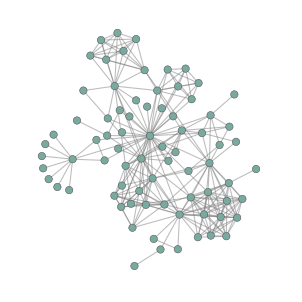

In [38]:
from netwulf import visualize
import netwulf as nw

stylized_network, config = visualize(LM_G,)